In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# BostonHousing

O exercício não especifíca quais são as variáveis regressoras e a variável dependente, então, vamos pegar a variável resposta como 'tax', que, segundo o kaggle seria: "full-value property-tax rate per $10,000"

CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS - proportion of non-retail business acres per town. <br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
NOX - nitric oxides concentration (parts per 10 million) <br>
RM - average number of rooms per dwelling <br>
AGE - proportion of owner-occupied units built prior to 1940 <br>
DIS - weighted distances to five Boston employment centres <br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per $10,000 <br>
PTRATIO - pupil-teacher ratio by town <br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - % lower status of the population <br>
MEDV - Median value of owner-occupied homes in $1000's 

In [3]:
data = pd.read_csv("data01/BostonHousing.csv")
data.shape

(506, 14)

Todo dataset

In [4]:
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Apenas variáveis regressoras

In [20]:
regressoras = data.iloc[:, data.columns != data.columns[9]]
regressoras.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


In [6]:
data_np = data.to_numpy()


In [7]:
data_np.shape

(506, 14)

In [8]:
y = data_np[:,9]
x = data_np[:, np.arange(data_np.shape[1]) !=(9)]

# Regressão Múltipla

## Scikit_Learn

In [10]:
from sklearn.model_selection import train_test_split, train_test_split, cross_val_score, GridSearchCV, cross_validate

p = 0.7
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=p, random_state=42)


Regressão múltipla

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
results_first = lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")
print("Algumas predições:",y_pred[1:5], "\n")

print("Coeficientes usando scikit_learn:", results_first.coef_, "\n")
print("Intercepto do scikit_learn", results_first.intercept_)

MSE: 3222.971642049947
R2: 0.8924296799073533
Algumas predições: [297.70267056 451.28859857 309.84770834 670.25018846] 

Coeficientes usando scikit_learn: [ -2.09508309  26.32378913  45.08274627  -5.37404019   7.3925149
  -1.17519357   0.52356759  -8.10861265 122.46895934   4.79371638
  -0.71385445  -5.90814398 -10.92955564] 

Intercepto do scikit_learn 409.2355577249702


Adjusted R-squared is important for analyzing multiple dependent variables’ efficacy on the model. Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly.

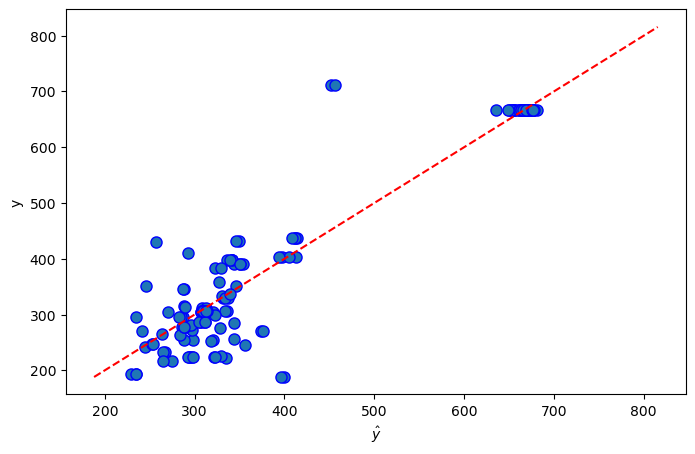

In [12]:
plt.figure(figsize=(8,5))

l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=8)
plt.setp(l, markerfacecolor='C0')

plt.xlabel("$\hat{y}$", fontsize=10)
plt.ylabel("y", fontsize=10)


xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)


Num modelo de regressão linear simples <br> $H_0: \beta_{1} = 0$ <br> $ H_1: \beta_{1} \neq 0 $

Na regressão múltipla, performamos o teste F de significância global (múltipla) <br> $H_0: \beta_1 = \beta_2 = ... = \beta_k = 0$ <br> vs <br> $ H_1: \forall i,j = 1,...,k \Rightarrow \beta_i \neq \beta_j \neq 0 $ <br> O teste compara um modelo sem preditores, ou seja, todos coeficientes das covariáveis são nulos e há apenas o intercepto, com o modelo múltiplo ajustado. Ao rejeitar $H_0$, conclui-se que as variáveis explicativas são de **fato explicativas**. <br> Ao não rejeitar $H_0$, não há evidência suficiente para concluir que uma covariável tem efeito estatístico significante na variável resposta. <br> Fazer um teste de significância conjunta não equivale a fazer um teste-t para cada variável individual. <br> No exemplo abaixo, o teste F resultou muito próximo de 0, o que rejeita a hipótese nula. <br> No entanto, observe que os testes-t individuais tanto rejeitam, quanto não rejeitam a hipótese nula.

## StatsModel

Observe que usando statsmodel, inicialmente, os resultados são diferentes com os do scikit_learn, já que aqui não foi considerado um intercepto

In [13]:
import statsmodels.api as sm

model_sm = sm.OLS(y_train, x_train) #ordinary least squares
results = model_sm.fit()

print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1591.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):                   4.39e-296
Time:                        18:25:31   Log-Likelihood:                         -1927.3
No. Observations:                 354   AIC:                                      3881.
Df Residuals:                     341   BIC:                                      3931.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

plot acurácia $(\hat{y}, y)$ no conjunto de teste usando o stats model (um pouco distinto do scikit_learn)

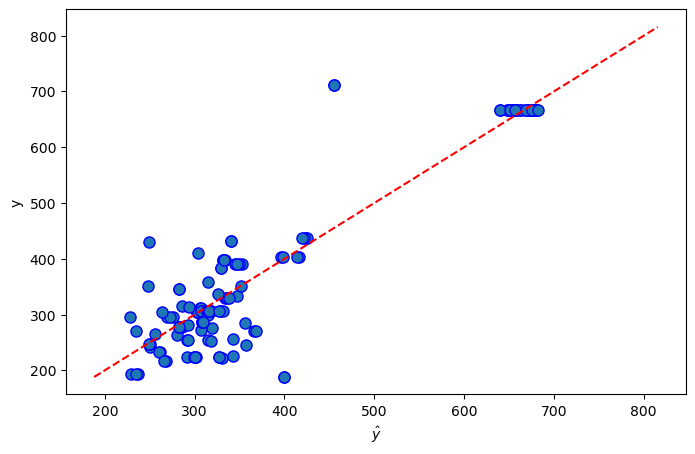

In [14]:
y_pred_sm = results.predict(x_test)

plt.figure(figsize=(8,5))

l = plt.plot(y_pred_sm, y_test, 'bo')
plt.setp(l, markersize=8)
plt.setp(l, markerfacecolor='C0')

plt.xlabel("$\hat{y}$", fontsize=10)
plt.ylabel("y", fontsize=10)


xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

### Estudo do modelo múltiplo com remoção de certas covariáveis, reduzindo multicolinearidade, e introduzindo um intercepto

**1) Introduzindo Intercepto:** <br> Note que aqui, os resultados são praticamente idênticos ao scikit_learn, já que em ambos foi introduzido um intercepto

In [31]:
x_train_intercept = sm.add_constant(x_train)

model_sm_intercepto = sm.OLS(y_train, x_train_intercept)
results_intercepto = model_sm_intercepto.fit()

print(results_intercepto.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.79e-153
Time:                        21:41:20   Log-Likelihood:                -1924.2
No. Observations:                 354   AIC:                             3876.
Df Residuals:                     340   BIC:                             3931.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.6585     72.946      2.449      0.0

A introdução de um intercepto aumentou a multicolinearidade do problema, como dado em [2] e certos coeficientes estimados mudaram também <br> O coeficiente R2 diminuiu. <br> certas Covariáveis tiveram alteração do p-valor no teste-t também. O erro padrão do intercepto e de algumas variáveis também aumentou.

O propósito de adicionar o intercepto é permitir que o modelo aprenda um **"bias"** que se aplicará às predições, mas os valores reais (y_train and y_test) permanecem inalterados, somente x_train e x_test tiveram uma coluna de $x=[1,...,1]^T$ introduzida. <br> Sem intercepto, os hiperplanos de regressão são obrigados a passar pela origem, o que pode não fazer sentido lógico em certas condições  



Talvez adicionar um intercepto ao problema, mesmo sendo adequado, dificulta a abordagem, vejamos o plot: <br> Repare que o erro quadrático médio continuou o mesmo para o modelo do scikit learn e o modelo do StatsModel com intercepto, e diminuiu pouco significativamente sem o intercepto

Scikit_Learn MSE com intercepto = 3222.971642049949 e seu r2 = 0.8924296799073532
Stats Model MSE com intercepto 3222.9716420499412 e seu r2 = 0.0889
Stats Model MSE sem intercepto 3317.755149020448 e seu r2 = 0.984


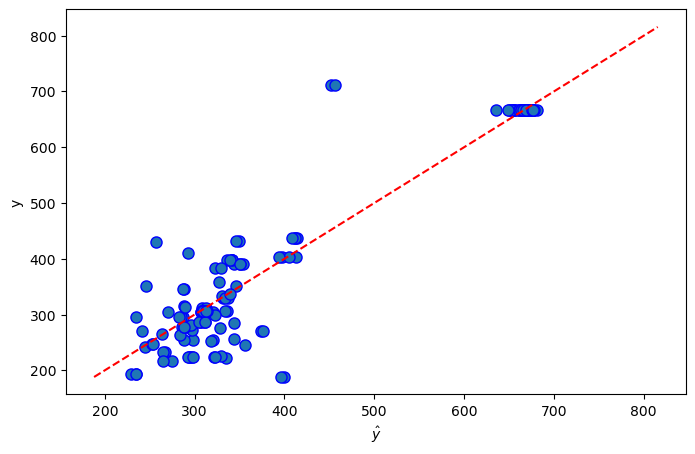

In [16]:
x_test_intercept = sm.add_constant(x_test)

y_pred_sm_intercepto = results_intercepto.predict(x_test_intercept)

print("Scikit_Learn MSE com intercepto =", mean_squared_error(y_pred, y_test), "e seu r2 =", r2 )
print("Stats Model MSE com intercepto", mean_squared_error(y_pred_sm_intercepto, y_test), "e seu r2 = 0.0889")
print("Stats Model MSE sem intercepto",mean_squared_error(y_pred_sm, y_test), "e seu r2 = 0.984")

plt.figure(figsize=(8,5))

l = plt.plot(y_pred_sm_intercepto, y_test, 'bo')
plt.setp(l, markersize=8)
plt.setp(l, markerfacecolor='C0')

plt.xlabel("$\hat{y}$", fontsize=10)
plt.ylabel("y", fontsize=10)


xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

**2) Multicolinearidade** <br> https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

Montgomery:

Multicollinearity denotes when two or more predictors have a near-linear relationship. Montgomery et al. offer one apt example: Imagine we analyze a supply chain delivery dataset in which long-distance deliveries regularly contain a high number of items while short-distance deliveries always contain smaller inventories. In this case, delivery distance and item quantity are linearly correlated, as shown in Figure 1. This creates problems when using these as independent variables in a single predictive model.



Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent.<br>

A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. The **interpretation of a regression coefficient** is that it **represents the mean change in the dependent variable for each 1 unit change in an independent variable** when **you hold all of the other independent variables constant**. That last portion is crucial for our discussion about multicollinearity.

The idea is that you can change the value of one independent variable and not the others. However, **when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable**. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

**Multicollinearity causes the following two basic types of problems**:

The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model. <br>
Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. **You might not be able to trust the p-values to identify independent variables that are statistically significant** <br> Now, throw in the fact that you can’t necessarily trust the p-values to select the independent variables to include in the model. This problem makes it difficult both to specify the correct model and to justify the model if many of your p-values are not statistically significant. <br> As the severity of the multicollinearity increases so do these problematic effects. However, these issues affect only those independent variables that are correlated. You can have a model with severe multicollinearity and yet some variables in the model can be completely unaffected. <br>


**The need to reduce multicollinearity depends on its severity** and your primary goal for your regression model. Keep the following three points in mind:

- The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.

- Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. Suppose your model contains the experimental variables of interest and some control variables. If high multicollinearity exists for the control variables but not the experimental variables, then you can interpret the experimental variables without problems.

- Multicollinearity **affects the coefficients and p-values, but it does not influence the predictions,** **precision of the predictions, and the goodness-of-fit statistics**. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity. <br>
        The fact that some or all predictor variables are correlated among themselves does not, in general, inhibit our ability to obtain a good fit nor does it tend to affect inferences about mean responses or predictions of new observations.  —Applied Linear Statistical Models, p289, 4th Edition.

Visualizing correlation matrix

In [19]:
correlation_matrix = pd.DataFrame(x_train[:,1:6]).corr()
print(correlation_matrix)

          0         1         2         3         4
0  1.000000 -0.544907 -0.031898 -0.527921  0.299282
1 -0.544907  1.000000  0.074533  0.764135 -0.407417
2 -0.031898  0.074533  1.000000  0.100199  0.139175
3 -0.527921  0.764135  0.100199  1.000000 -0.305756
4  0.299282 -0.407417  0.139175 -0.305756  1.000000


Variance Inflation Factor (VIF)

If you can identify which variables are affected by multicollinearity and the strength of the correlation, you’re well on your way to determining whether you need to fix it. There is a test to assess multicollinearity in regression models. The variance inflation factor (VIF) identifies correlation between independent variables and the strength of that correlation.

VIFs start at 1 and have no upper limit. A value of 1 indicates that there is no correlation between this independent variable and any others. VIFs between 1 and 5 suggest that there is a moderate correlation, but it is not severe enough to warrant corrective measures. VIFs greater than 5 represent **critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable.**

Use VIFs to identify correlations between variables and determine the strength of the relationships.

In [22]:
print(regressoras.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = pd.DataFrame(x_train).columns
vif_data["VIF"] = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]

print(vif_data)


    feature         VIF
0         0    2.073015
1         1    2.772920
2         2   11.341965
3         3    1.205521
4         4   76.435480
5         5  135.192622
6         6   21.574067
7         7   14.857071
8         8    5.634259
9         9   77.655919
10       10   22.770054
11       11   11.963152
12       12   25.238694


In [50]:
x_train_centered = x_train - np.mean(x_train, axis=0)

vif_data = pd.DataFrame()
vif_data["feature"] = pd.DataFrame(x_train_centered).columns
vif_data["VIF"] = [variance_inflation_factor(x_train_centered, i) for i in range(x_train_centered.shape[1])]

print(vif_data)

    feature       VIF
0         0  1.778376
1         1  2.166797
2         2  3.083531
3         3  1.120113
4         4  4.419034
5         5  3.954981
6         6  2.887407
7         7  1.994116
8         8  1.279429
9         9  3.023650
10       10  3.206291


In [28]:
x_train_intercept_centered = sm.add_constant(x_train_centered)

model_sm_intercepto_centrado = sm.OLS(y_train, x_train_intercept_centered)
results_intercepto_centrado = model_sm_intercepto_centrado.fit()

print(results_intercepto_centrado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.79e-153
Time:                        18:45:47   Log-Likelihood:                -1924.2
No. Observations:                 354   AIC:                             3876.
Df Residuals:                     340   BIC:                             3931.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        407.0424      3.011    135.199      0.0

A aplicação do VIF diminuiu o erro padrão do coeficiente de intercepto e a multicolinearidade diminuiu em uma grandeza

3) Eliminando variáveis

Eliminemos x6, x7, x11

In [33]:
regressoras.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


In [34]:
x_new = np.delete(x, [5,6], axis=1)

In [38]:
from sklearn.model_selection import train_test_split, train_test_split, cross_val_score, GridSearchCV, cross_validate

p = 0.7
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y, train_size=p, random_state=42)


In [53]:
#x_new_train_intercept = sm.add_constant(x_new_train)
x_new_train_centered = x_new_train - np.mean(x_new_train, axis=0)
x_new_train_intercept_centered = sm.add_constant(x_new_train_centered)

x_new_test_centered = x_new_test - np.mean(x_new_test, axis = 0) 
x_new_test_intercept_centered = sm.add_constant(x_new_test_centered)

In [54]:
model_sm_new_intercepto_centrado = sm.OLS(y_train, x_new_train_intercept_centered)
results_new_intercepto_centrado = model_sm_new_intercepto_centrado.fit()

print(results_new_intercepto_centrado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     247.8
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.58e-155
Time:                        22:20:50   Log-Likelihood:                -1924.2
No. Observations:                 354   AIC:                             3872.
Df Residuals:                     342   BIC:                             3919.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        407.0424      3.002    135.582      0.0

In [58]:
y_pred_new_sm_intercepto_centered = results_new_intercepto_centrado.predict(x_new_test_intercept_centered)
print("MSE: ", mean_squared_error(y_pred_new_sm_intercepto_centered, y_test))

MSE:  3228.7903772956897


# Regressão Lasso e Ridge

Lasso

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score

scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [62]:
p = 0.7
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = p, random_state = 42)

In [114]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

alpha = 1
lasso = Lasso(alpha=alpha, max_iter=100000)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE Lasso:", mse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

print("\n", lasso.coef_, "\n")
print(lasso.intercept_)

MSE Lasso: 3203.9424046941367
R2: 0.8930648022046694

 [-0.00000000e+00  2.15931165e+01  4.47835856e+01 -4.34000602e+00
  6.65216579e+00 -0.00000000e+00  0.00000000e+00 -3.69717632e+00
  1.21317059e+02  3.74156301e+00 -7.49222298e-02 -0.00000000e+00
 -7.30257394e+00] 

409.1532643388198


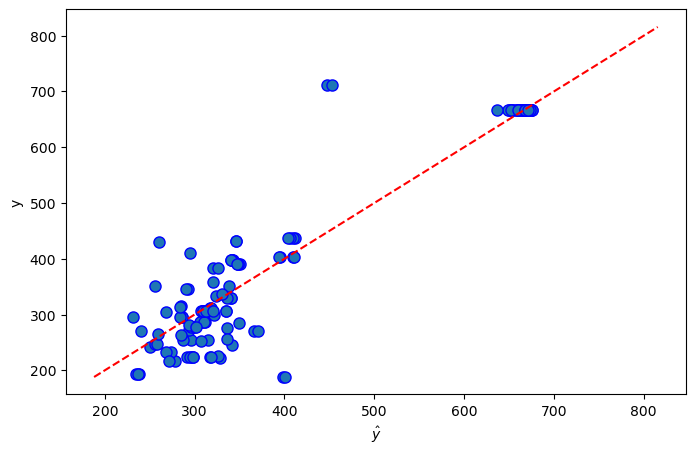

In [74]:
plt.figure(figsize=(8,5))

l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=8)
plt.setp(l, markerfacecolor='C0')

plt.xlabel("$\hat{y}$", fontsize=10)
plt.ylabel("y", fontsize=10)


xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

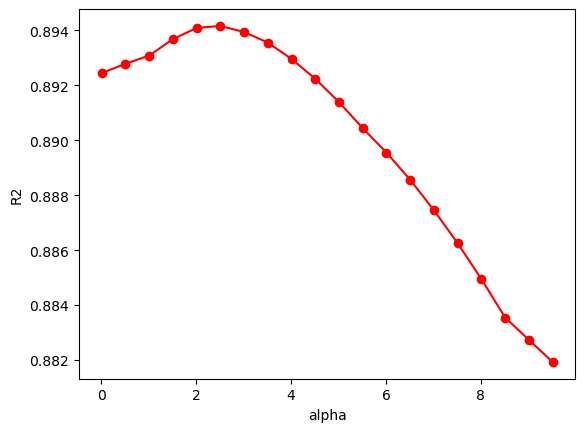

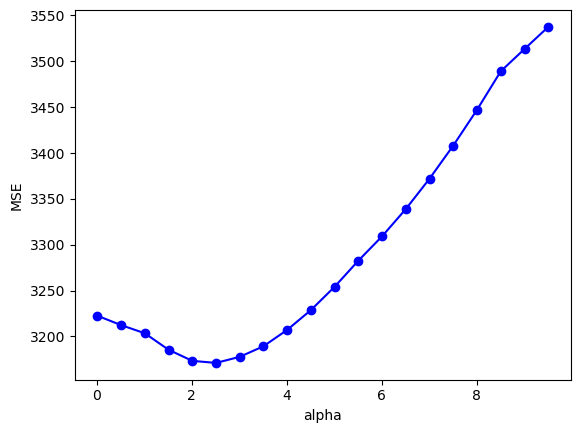

In [124]:
vr2 = []
valpha = []
mselist = []

for alpha in np.arange(0.01, 10, 0.5):
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    vr2.append(r2)
    valpha.append(alpha)
    mselist.append(mse)

plt.plot(valpha, vr2, '-ro')
plt.xlabel("alpha", fontsize = 10)
plt.ylabel("R2", fontsize=10)
plt.show()


plt.plot(valpha, mselist, '-bo')
plt.xlabel("alpha", fontsize = 10)
plt.ylabel("MSE", fontsize=10)
plt.show()

In [112]:
lasso_best = Lasso(alpha = 2.5)
lasso_best.fit(x_train, y_train)
print(lasso_best.coef_)
print(lasso_best.intercept_)

[  0.          15.65852486  44.27219917  -2.89441671   5.46819306
  -0.           0.          -0.         122.04763025   1.48275712
  -0.           0.          -6.81000786]
409.0119221847457


Ridge

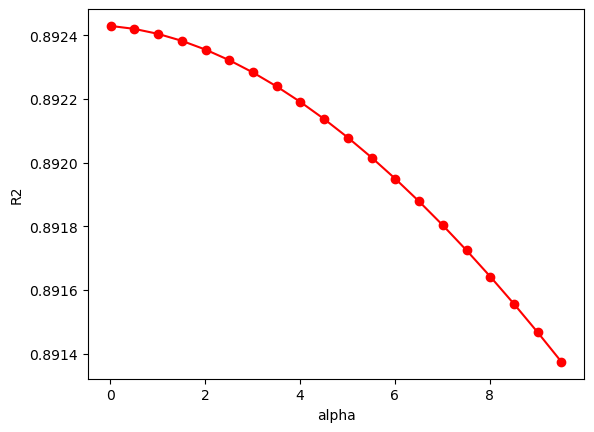

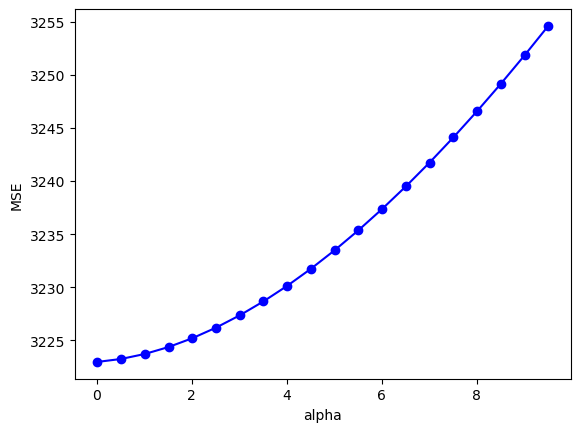

In [127]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

vr2 = []
valpha = []
mselist = []

for alpha in np.arange(0.01, 10, 0.5):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    vr2.append(r2)
    valpha.append(alpha)
    mselist.append(mse)


plt.plot(valpha, vr2, '-ro')
plt.xlabel("alpha", fontsize = 10)
plt.ylabel("R2", fontsize=10)
plt.show()

plt.plot(valpha, mselist, '-bo')
plt.xlabel("alpha", fontsize = 10)
plt.ylabel("MSE", fontsize=10)
plt.show()


In [123]:
ridge_best = Ridge(alpha = 0)
ridge_best.fit(x_train, y_train)
print(ridge_best.coef_)
print(ridge_best.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

[ -2.09508309  26.32378913  45.08274627  -5.37404019   7.3925149
  -1.17519357   0.52356759  -8.10861265 122.46895934   4.79371638
  -0.71385445  -5.90814398 -10.92955564]
409.2355577249702
MSE: 3254.589943205789
R2: 0.8913743833817046


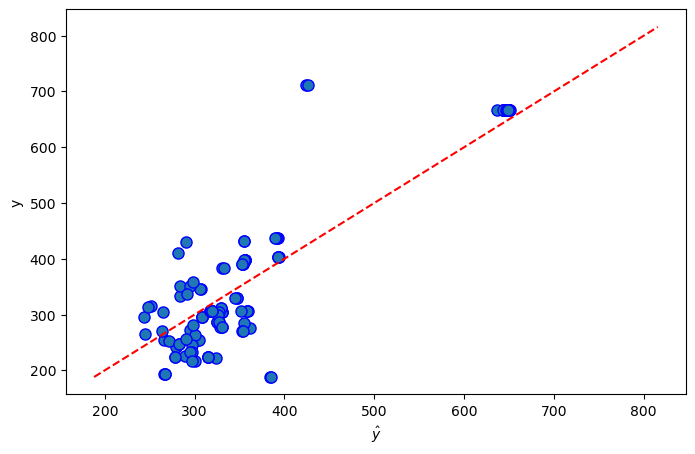

In [125]:
plt.figure(figsize=(8,5))

l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=8)
plt.setp(l, markerfacecolor='C0')

plt.xlabel("$\hat{y}$", fontsize=10)
plt.ylabel("y", fontsize=10)


xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

# Regressão Polinomial

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

# Função para gerar os dados
def function(x):
    y = x**4 + x**9
    return y

# Training set
N_train = 20
sigma = 0.2
x_train = np.linspace(0, 1, N_train)
y_train = function(x_train) + np.random.normal(0, sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="training data")

# Test set
N_test = 20
x_test = np.linspace(0, 1, N_test)
y_test = function(x_test) + np.random.normal(0, sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teorica
xt = np.linspace(0, 1, 100)
yt = function(xt)

plt.plot(xt, yt, '-r', label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)


Portanto, para ajustar um modelo com variáveis não lineares, basta gerarmos um novo conjunto de dados inserindo novas colunas aos dados originais e realizar o procedimento de regressão multivariada. Cada coluna inserida contém os dados originais elevados a uma potência definida pelos termos do modelo.

Iniciemos o exercício com o ajuste de um polinômio com um grau arbitrário, seja = 3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=3, include_bias=False)
transformer.fit(x_train)

x_train_ = transformer.transform(x_train)
print('Novos dados:\n', x_train_)

x_test_ = transformer.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train_, y_train)
y_pred = model.predict(x_test_)

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)
plt.title("Gráfico de valores de test vs predições")

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

In [ ]:
plt.plot(x_test,y_test, 'ro', label='Dados originais')
plt.plot(x_test,y_pred, 'bo-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)

Agora, faremos uma seleção de modelos de acordo com diversos graus do polinômio

In [ ]:
degrees = []
mses = []
r2s = []

for degree in range(1, 11):
    transformer = PolynomialFeatures(degree=degree, include_bias=False)
    transformer.fit(x_train)
    x_train_ = transformer.transform(x_train)
    x_test_ = transformer.transform(x_test)
    model = LinearRegression().fit(x_train_, y_train)
    y_pred = model.predict(x_test_)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    degrees.append(degree)
    mses.append(mse)
    r2s.append(r2)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,6))

ax1.plot(degrees, mses, 'bo-', label = 'mse')
ax1.set_xlabel('graus polinômio')
ax1.set_ylabel('MSE')
ax1.set_title("MSE vs Grau")
ax1.legend()

ax2.plot(degrees, r2s, 'ro-', label = 'r2')
ax2.set_xlabel('graus polinômio')
ax2.set_ylabel('R2')
ax2.set_title("R2 vs Grau")
ax2.legend()

plt.show()